In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
appData = pd.read_csv('application_data.csv')
appData.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
appData.shape

(307511, 122)

## Data Cleaning

#### Null Values

In [4]:
#Prints columns and there null value count, the attribute "Flag" in the method, if TRUE will return columns where null 
#count is greater than 0
def printColumns(df, flag):
    nulls = df.isnull().sum()
    if flag:
        nulls = nulls[nulls > 0]
    nulls = nulls / len(df.index) * 100
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(nulls)  

In [5]:
#Finds the columns which has null values and print them
printColumns(appData, False)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

**Since we have columns with more than 30% of missing values, We have decided to remove those columns since they serve to no help in the analysis.**

In [6]:
nullCount = appData.isna().sum()
nullCount = nullCount * 100 / len(appData.index)
appData = appData[nullCount[nullCount < 30].index]

In [7]:
printColumns(appData, True)

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64


We can see that after removal of columns having more than 30% of nulls, **EXT_SOURCE_3** has the highest null values of 19%, removing those Data points might remove any other null data points in other columns too.

In [8]:
#removal of data points where EXT_SOURCE_3 is NULL
appData = appData[~appData.EXT_SOURCE_3.isna()]

In [9]:
printColumns(appData, True)

AMT_ANNUITY                 0.004462
AMT_GOODS_PRICE             0.085177
NAME_TYPE_SUITE             0.437241
CNT_FAM_MEMBERS             0.000406
EXT_SOURCE_2                0.174410
OBS_30_CNT_SOCIAL_CIRCLE    0.303797
DEF_30_CNT_SOCIAL_CIRCLE    0.303797
OBS_60_CNT_SOCIAL_CIRCLE    0.303797
DEF_60_CNT_SOCIAL_CIRCLE    0.303797
dtype: float64


Since the remaining null values are lesser than 1%, we can either impute values or remove them based on the engineer's decision. We can proceed wiht visualizations since **Seaborn or Matplotlib** can neglect the null data points for visualising 

#### Removal of unwanted columns

We found no possible reason to include FLAG_DOCUMENT's and EXT_SOURCE's in the DataFrame since they serve very less purpose in our analysis as they are categorical Data. Removing columns also helps in reducing the storage size for the DataFrame making it easy to work on

In [10]:
#list where column names if 'FLAG_DOCUMENT' or 'EXT' exist in column list, then it adds to the unwantedLst list and then we
#remove them from the DataFrame
unwantedLst = [i for i in appData.columns if 'FLAG_DOCUMENT' in i]
unwantedLst += [i for i in appData.columns if 'EXT' in i]
appData.drop(unwantedLst, axis = 1, inplace = True)
appData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF

#### Cleaning the values in few columns

**Gender:**

In [11]:
appData.CODE_GENDER.value_counts()

F      163835
M       82707
XNA         4
Name: CODE_GENDER, dtype: int64

There are exactly 4 data points, where gender is XNA i.e., the Gender is not available. Ignoring these values will cause problem during visualising as it is not NULL value.
Since, most of the applicants are Female, we can impute these XNA to Female values

In [12]:
appData.CODE_GENDER = appData.CODE_GENDER.apply(lambda x: 'F' if x == 'XNA' else x) #replacing 'XNA' to 'F'
appData.CODE_GENDER.value_counts()

F    163839
M     82707
Name: CODE_GENDER, dtype: int64

**Children Count**

In [13]:
appData.CNT_CHILDREN.value_counts()

0     171545
1      49524
2      22001
3       3041
4        331
5         70
6         16
7          6
14         3
12         2
9          2
8          2
19         1
11         1
10         1
Name: CNT_CHILDREN, dtype: int64

Since we are focusing on Urban Region more, it is highly impossible for applicants to have more than 4 children. These rows will affect the analysis if not treated correctly. <br>
For the sake of analysis, We will be removing these rows

In [14]:
appData= appData[appData.CNT_CHILDREN < 5] #extracting rows where children count is less than 5
appData.CNT_CHILDREN.value_counts()

0    171545
1     49524
2     22001
3      3041
4       331
Name: CNT_CHILDREN, dtype: int64

**Organisation Type**

In [15]:
appData.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    53744
XNA                       44300
Self-employed             28779
Other                     13465
Medicine                   9555
Business Entity Type 2     8865
Government                 8762
School                     7535
Trade: type 7              5983
Kindergarten               5786
Construction               5228
Business Entity Type 1     4928
Transport: type 4          4328
Industry: type 9           2877
Trade: type 3              2802
Industry: type 3           2684
Security                   2605
Housing                    2410
Industry: type 11          2224
Military                   2216
Bank                       2106
Police                     2056
Transport: type 2          1942
Agriculture                1870
Security Ministries        1753
Postal                     1722
Trade: type 2              1448
Restaurant                 1365
Services                   1213
University                 1111
Industry: type 7           1095
Transpor

There are about 44305 rows where the **organisation type** is XNA i.e., not available. For the sake of analysis, it is best to remove them not causing any interference with the visualisations further

In [16]:
appData = appData[appData.ORGANIZATION_TYPE != 'XNA'] #removing rows where organisation type is 'XNA'

In [17]:
appData.shape

(202142, 50)

## Analysis

Since the spread of values is bigger for the columns **AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY** it would be difficult to visualise. Therefore, we need to create bins in order to visualise correctly using pandas **pandas.cut()**

In [18]:
#Bins for AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE
AMTbins = np.arange(0, 10**6, 1*10**5).tolist()
AMTbins.append(10**9)
labels = []
for i in range(0, len(AMTbins) - 1):
    if i < len(AMTbins) - 2:
        labels.append('{}-{}'.format(AMTbins[i], AMTbins[i + 1]))
    else:
        labels.append('{}-'.format(AMTbins[i]))
print(labels)

['0-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000', '500000-600000', '600000-700000', '700000-800000', '800000-900000', '900000-']


In [19]:
#creating bins based on their respective value
appData['AMT_INCOME_RANGE']= pd.cut(appData.AMT_INCOME_TOTAL, bins=AMTbins, labels=labels)
appData['AMT_CREDIT_RANGE']= pd.cut(appData.AMT_CREDIT, bins=AMTbins, labels=labels)
appData['AMT_GOODS_RANGE']= pd.cut(appData.AMT_GOODS_PRICE, bins=AMTbins, labels=labels)

In [20]:
#bins for AMT_ANNUITY since its range of values is much smaller than others
bins = np.arange(0, 10**5, 1*10**4).tolist()
bins.append(10**9)
Annuitylabels = []
for i in range(0, len(bins) - 1):
    if i < len(bins) - 2:
        Annuitylabels.append('{}-{}'.format(bins[i], bins[i + 1]))
    else:
        Annuitylabels.append('{}-'.format(bins[i]))
print(Annuitylabels)

['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000-']


In [21]:
#creating bins based on their respective value
appData['AMT_ANNUITY_RANGE'] = pd.cut(appData.AMT_ANNUITY, bins=bins, labels=Annuitylabels)
appData[['AMT_ANNUITY', 'AMT_ANNUITY_RANGE']].head(5)

,AMT_ANNUITY,AMT_ANNUITY_RANGE
0,24700.5,20000-30000
2,6750.0,0-10000
5,27517.5,20000-30000
6,41301.0,40000-50000
7,42075.0,40000-50000


**Data Imbalance**

In [22]:
sum(appData.TARGET == 0)

185293

In [23]:
sum(appData.TARGET == 1)

16849

In [24]:
#Since, tar0_Data has higher values than tar1_Data
Dataimbalance = sum(appData.TARGET == 0) / sum(appData.TARGET == 1)
Dataimbalance

10.997269867647931

There is **Data Imbalance** in the DataFrame with the ratio of **11.9**, so analysing them separatly would give us better insights <br>
**Note**: Some visualizations are done on the main Dataset by not splitting, since those visualizations expect that way, count plots are plotted by their percentage and probability values which helps in visualising a lot

#### Splitting the DataFrame with respect to target variable

In [25]:
tar1_Data = appData[appData.TARGET == 1] #Data where applicants with payment difficulties: he/she had late payment
del tar1_Data['TARGET'] #deleting the target column
tar0_Data = appData[appData.TARGET == 0] #Data where applicants without payment difficulties/ all the other cases
del tar0_Data['TARGET'] #deleting the target column

### Univariate Analysis

**Count plot of ORGANISATION_TYPE**

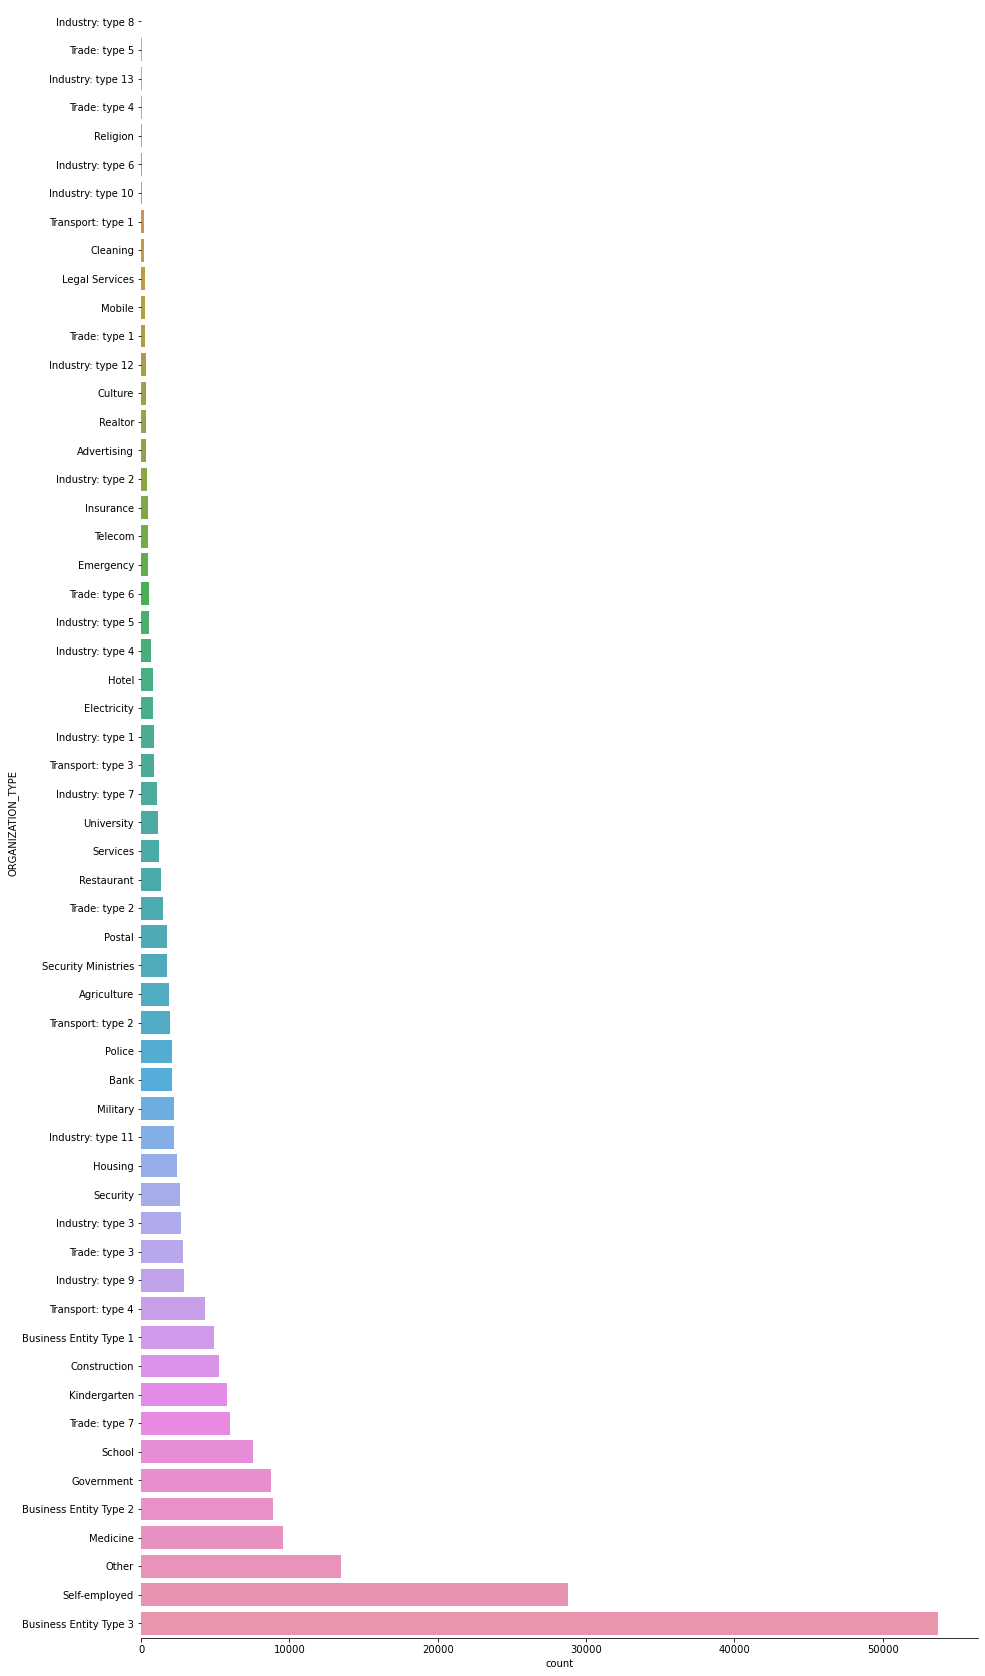

In [26]:
plt.figure(figsize=(15,30))
#count plot and arranging them in ascending order
sns.countplot(y=appData.ORGANIZATION_TYPE, order=appData.ORGANIZATION_TYPE.value_counts(ascending=True).index)
sns.despine(left=True)

Inferences from the above plot:
1. Most of our applicants work in **Business type 3**
2. Second highest count for the applicants is **Self Employed**
3. very less applicants are from **industry type 8**

**Count plot based on Income type**

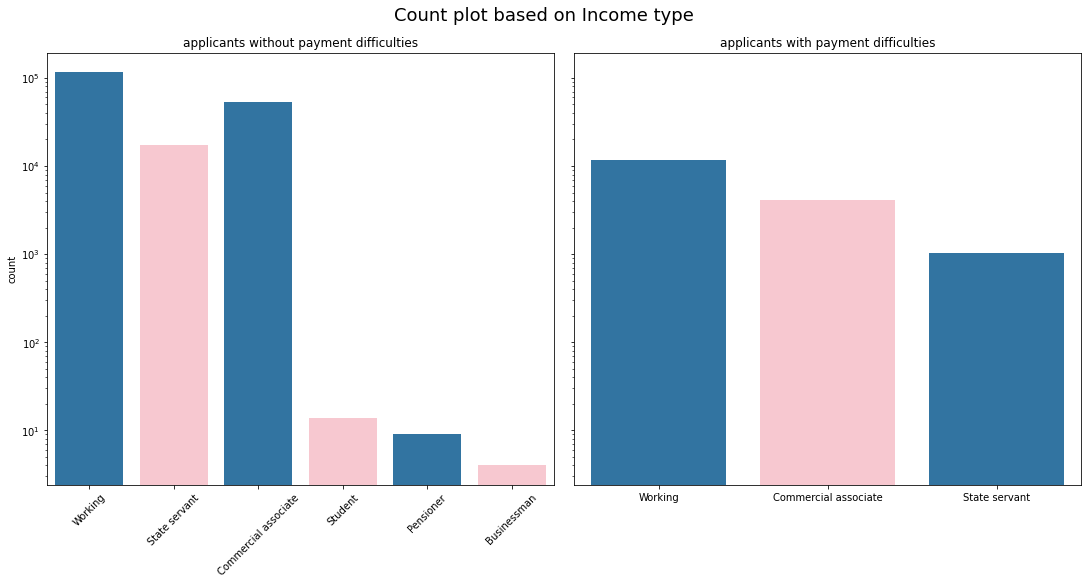

In [27]:
fig, ax = plt.subplots(1,2, constrained_layout= True, sharey= True, figsize= (15,8))
fig.suptitle('Count plot based on Income type', fontsize= 18)
sns.countplot(ax= ax[0], data= tar0_Data, x= 'NAME_INCOME_TYPE', palette=['C0','pink'])
plt.yscale('log')
ax[0].set_title('applicants without payment difficulties')
ax[0].set_xlabel('')
ax[0].set_yscale('log') #changing the y axis scale to logarithmic
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45) #rotating the x axis values by 45 degree

sns.countplot(ax= ax[1], data= tar1_Data, x= 'NAME_INCOME_TYPE', palette=['C0','pink'])
plt.yscale('log')
ax[1].set_title('applicants with payment difficulties')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_yscale('log') #changing the y axis scale to logarithmic

Inferences based on the above graphs:
1. It seems that Students, Unemployed and Businessmen seems to have no trouble in payments
2. Working professionals have higher count when compared to others

**Box plot for annual income, amount annuity, credit amount, goods price**

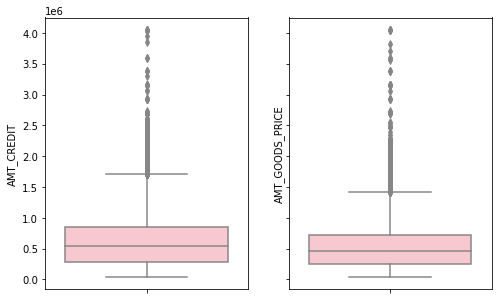

In [28]:
fig, ax= plt.subplots(1, 2, sharey= True, figsize= (8,5))
#Box plot with shared y-axis
sns.boxplot(y=tar0_Data.AMT_CREDIT, ax= ax[0], color='pink')
sns.boxplot(y=tar0_Data.AMT_GOODS_PRICE, ax= ax[1], color='pink');

Inferences from plots above:
1. Outliers have been identified
2. applicants mostly quote for more amount than the actual Goods price

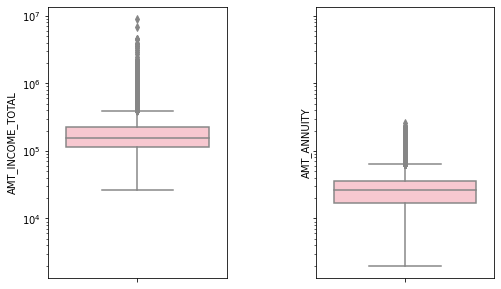

In [29]:
fig, ax= plt.subplots(1,2, sharey= True, figsize= (8,5))
fig.subplots_adjust(wspace=0.5) #increasing the gap between 2 subplots
plt.yscale('log')
#Box plot with shared y-axis
sns.boxplot(y= tar0_Data.AMT_INCOME_TOTAL, ax= ax[0], color='pink')
sns.boxplot(y=tar0_Data.AMT_ANNUITY, ax= ax[1], color='pink');

Inferences from the above graph:
1. Outliers have been identified
2. Annual annuity is generally lesser than applicant's annual income

### Segmented Univariate Analysis

In [30]:
#creating a function for segmented univariate analysis
def UniCountPlot(data, x, title=None, hue=None):
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    
    ax = sns.countplot(data= data, x= x, hue=hue, palette=["C0", "pink"])
    sns.despine(left=True, bottom=True) #removing the frame of the graph
    ax.set_title(title, fontsize= 15)
    plt.xticks(rotation= 45, fontsize= 12)
    plt.yscale('log') #y axis in logarithmic scale

#### Analysis on applicant's income based on gender

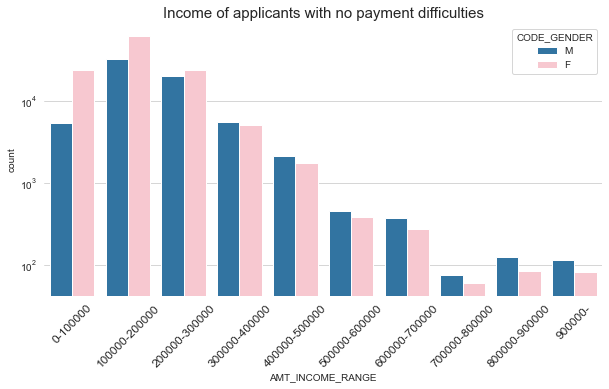

In [31]:
UniCountPlot(data= tar0_Data, x= 'AMT_INCOME_RANGE', hue= 'CODE_GENDER', title = 'Income of applicants with no payment difficulties')

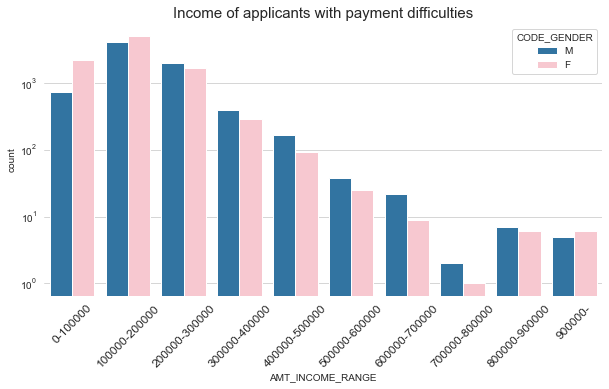

In [32]:
UniCountPlot(data= tar1_Data, x= 'AMT_INCOME_RANGE', hue= 'CODE_GENDER', title = 'Income of applicants with payment difficulties')

Inferences made from both the graphs above:
1. Salaries in the range 0-300000 are earned by women more than men
2. Most people including men and women who apply for loan earn salaries between 100000-200000 range
3. In the salary range 300000-900000, Men earn more than women
4. Very less people earn in 700000-800000 range
5. Until a certain salary of 400000, women tend to have no payment difficulties compared to men
6. Even though there are less men in the Data, men earn more salaries than women
7. In each group, there is less gap in frequency of salaries men and women who have no payment difficulties
8. Women who earn salaries above 900000, face payment difficulties when compared to men

#### Analysis on people who accompanied the applicant during the process based on gender

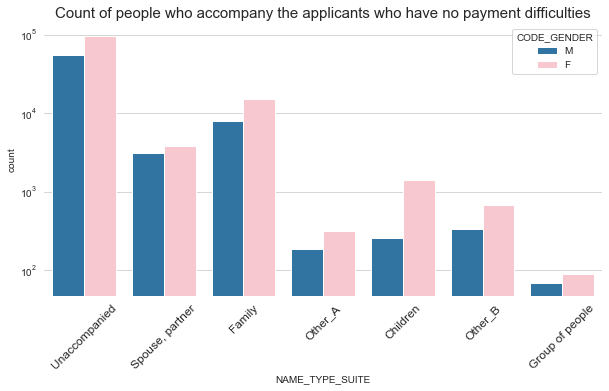

In [33]:
UniCountPlot(data= tar0_Data, x= 'NAME_TYPE_SUITE', hue= 'CODE_GENDER', title= 'Count of people who accompany the applicants who have no payment difficulties')

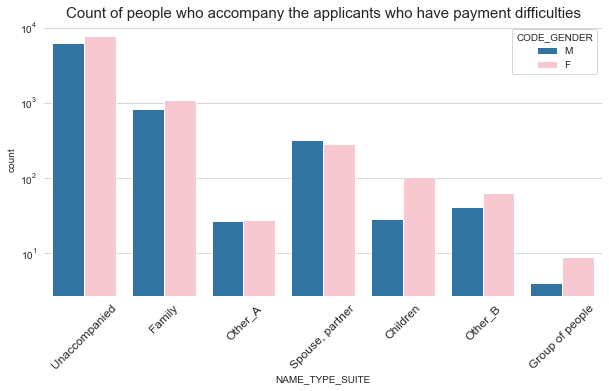

In [34]:
UniCountPlot(data= tar1_Data, x= 'NAME_TYPE_SUITE', hue= 'CODE_GENDER', title= 'Count of people who accompany the applicants who have payment difficulties')

Inferences from both the graphs above:
1. Most applicants come "Unaccompanied" at the time of applying
2. Men who accompany with Spouse/partner tend to have payment difficulties when compared to women

**count plot on Employment time based on target value**

In [35]:
#Since DAYS_EMPLOYED is a continous variable, we need to create bins for age in years based on single year
Agebins = np.arange(0, 10, 1).tolist()  #bins
Agebins.append(10**9)
Agelabels = []
for i in range(0, len(Agebins) - 1): #to create labels for the bins
    if i < len(Agebins) - 2:
        Agelabels.append('{}-{}'.format(Agebins[i], Agebins[i + 1]))
    else:
        Agelabels.append('{}-'.format(Agebins[i]))
print(Agelabels)

['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-']


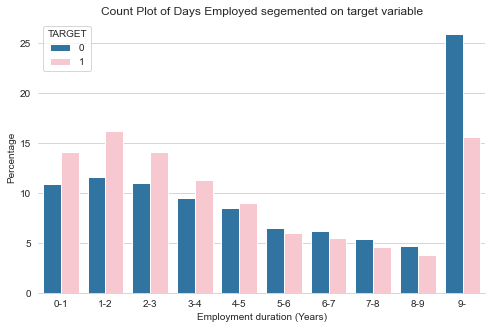

In [36]:
tmp = appData.copy() #taking a copy of the DataFrame
tmp['YEARS_EMPLOYED']= round(-tmp.DAYS_EMPLOYED/365,1) #Converting Days to years
tmp['EMPLOYED_RANGE'] = pd.cut(tmp.YEARS_EMPLOYED, bins=Agebins, labels= Agelabels) #bining the age variable
#grouping the Data by target and taking the bined column by value_counts, and normalizing the count
per = tmp.groupby('TARGET')['EMPLOYED_RANGE'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=per, x='EMPLOYED_RANGE', y='Percentage', hue='TARGET', palette=["C0", "pink"]) #count plot by percentage
plt.title('Count Plot of Days Employed segemented on target variable', fontsize=12)
plt.xlabel('Employment duration (Years)');
sns.despine(left=True);

Inference from the above graph:
1. applicants who are working for more than 6 years are less likely to default
2. applicants who have changed employment within 0-5 years of time defaulted more.

**Count plot for region population**

In [37]:
#Since the normalised score is continous, we need to create bins for visualizing it
Populationbins = np.arange(0, 0.1,0.01) #bins
Populationlabels = []
for i in range(0, len(Populationbins) - 1): #for labels
    if i < len(Populationbins) - 2:
        Populationlabels.append('{}-{}'.format(Populationbins[i], Populationbins[i + 1]))
    else:
        Populationlabels.append('{}-'.format(Populationbins[i]))
print(Populationlabels)

['0.0-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06', '0.06-0.07', '0.07-0.08', '0.08-']


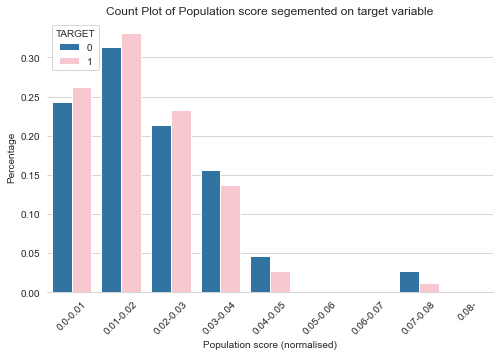

In [38]:
tmp = appData.copy() #taking a copy of the DataFrame
#Creating a bin for each value
tmp['POPULATION_RANGE'] = pd.cut(tmp.REGION_POPULATION_RELATIVE, bins=Populationbins, labels= Populationlabels)
#groups the dataframe on target variable, retrieves only Population_range based on normalised counts
per = tmp.groupby('TARGET')['POPULATION_RANGE'].value_counts(normalize=True).rename('Percentage').reset_index()
plt.figure(figsize=(8,5))
#count plot by percentage values
sns.barplot(data=per, x='POPULATION_RANGE', y='Percentage', hue='TARGET', palette=["C0", "pink"]) 
plt.xticks(rotation=45)
plt.title('Count Plot of Population score segemented on target variable', fontsize=12)
plt.xlabel('Population score (normalised)');
sns.despine(left=True)

Inferences from above plot:
1. applicants from less populated areas seems to have more defaulters
2. higher the population density, lesser the defaulter applicants

### Bivariate Analysis

In [39]:
#creating a function for bivariate boxplot
def BiBox(df, x, y, title, hue=None, scale= False):
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data= df, x=x, y=y, hue=hue)
    plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    sns.despine(left=True)
    
    ax.set_title(title, fontsize= 13, pad= 40)

**Bivariate analysis on gender and goods price and segmented on income type**

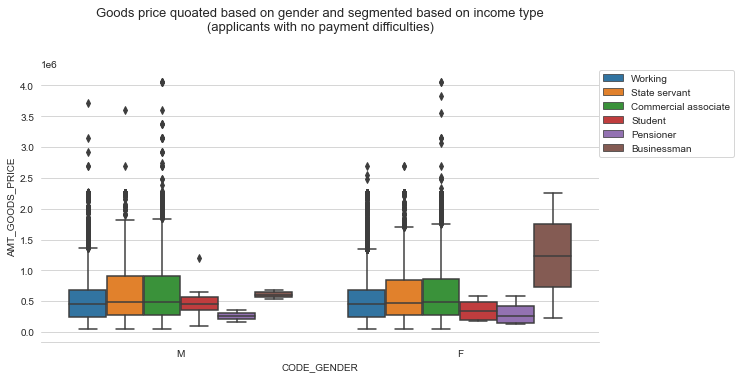

In [40]:
BiBox(tar0_Data, x= 'CODE_GENDER', y='AMT_GOODS_PRICE', hue= 'NAME_INCOME_TYPE', title= 'Goods price quoated based on gender and segmented based on income type\n(applicants with no payment difficulties)')

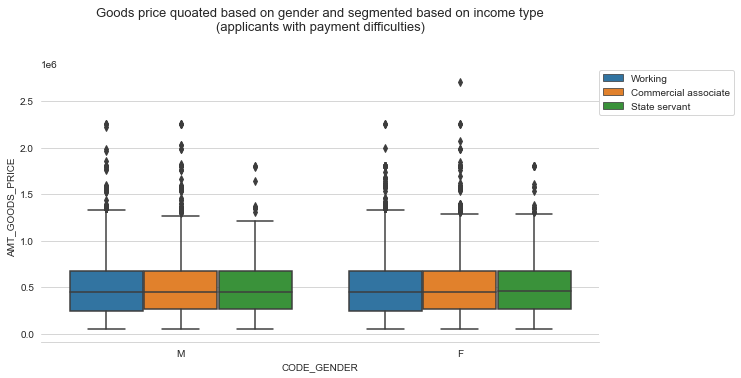

In [41]:
BiBox(tar1_Data, x= 'CODE_GENDER', y='AMT_GOODS_PRICE', hue= 'NAME_INCOME_TYPE', title= 'Goods price quoated based on gender and segmented based on income type\n(applicants with payment difficulties)')

Inferences from the above plots:
1. Outliers are found in both the plots
2. Comparing both the plots, we can find no Business, Students or Unemployed applicants with payment difficulties
3. Businesswomen have a very wide range in Goods Price compared to Businessmen
4. Unemployed men tend have very less range in Goods price but quote higher compared to women, where they have slightly bigger spread but price lesser than men
5. applicants with payments difficulties tends to have very equal range of goods price in all sectors of income
6. Commercial Associate applicants tend to have higher goods price compared to all

**Bivariate analysis using violen plot on age and amount annuity segmented on edcation type**

In [42]:
#creating a new column to store age in years
tar0_Data['AGE_YEARS'] = -tar0_Data.DAYS_BIRTH / 365
tar0_Data.AGE_YEARS= tar0_Data.AGE_YEARS.astype('int')

tar1_Data['AGE_YEARS'] = -tar1_Data.DAYS_BIRTH / 365
tar1_Data.AGE_YEARS= tar1_Data.AGE_YEARS.astype('int')

#age bins for applicant's age
Agebins = np.arange(20, 80, 10).tolist()
Agebins.append(10**9)
Agelabels = []
for i in range(0, len(Agebins) - 1):
    if i < len(Agebins) - 2:
        Agelabels.append('{}-{}'.format(Agebins[i], Agebins[i + 1]))
    else:
        Agelabels.append('{}-'.format(Agebins[i]))
print(Agelabels)

['20-30', '30-40', '40-50', '50-60', '60-70', '70-']


In [43]:
#creating age buckets for applicants
tar0_Data['AGE_BUCKET'] = pd.cut(tar0_Data.AGE_YEARS, bins=Agebins, labels= Agelabels)
tar1_Data['AGE_BUCKET'] = pd.cut(tar1_Data.AGE_YEARS, bins=Agebins, labels= Agelabels)

tar0_Data[['AGE_YEARS', 'AGE_BUCKET']].head(5)

,AGE_YEARS,AGE_BUCKET
2,52,50-60
5,46,40-50
6,37,30-40
7,51,50-60
10,27,20-30


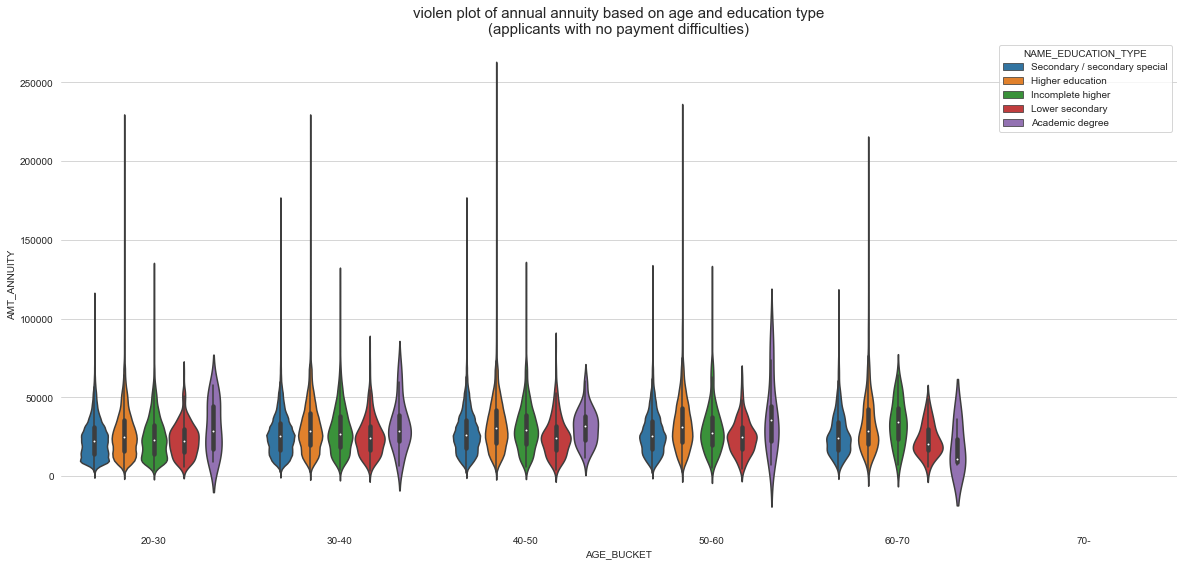

In [44]:
plt.figure(figsize=(20,9))
#violen plot
sns.violinplot(data=tar0_Data, x='AGE_BUCKET', y='AMT_ANNUITY', hue='NAME_EDUCATION_TYPE')
sns.despine(left=True, bottom=True)
plt.title('violen plot of annual annuity based on age and education type\n(applicants with no payment difficulties)',
          fontsize= 15);

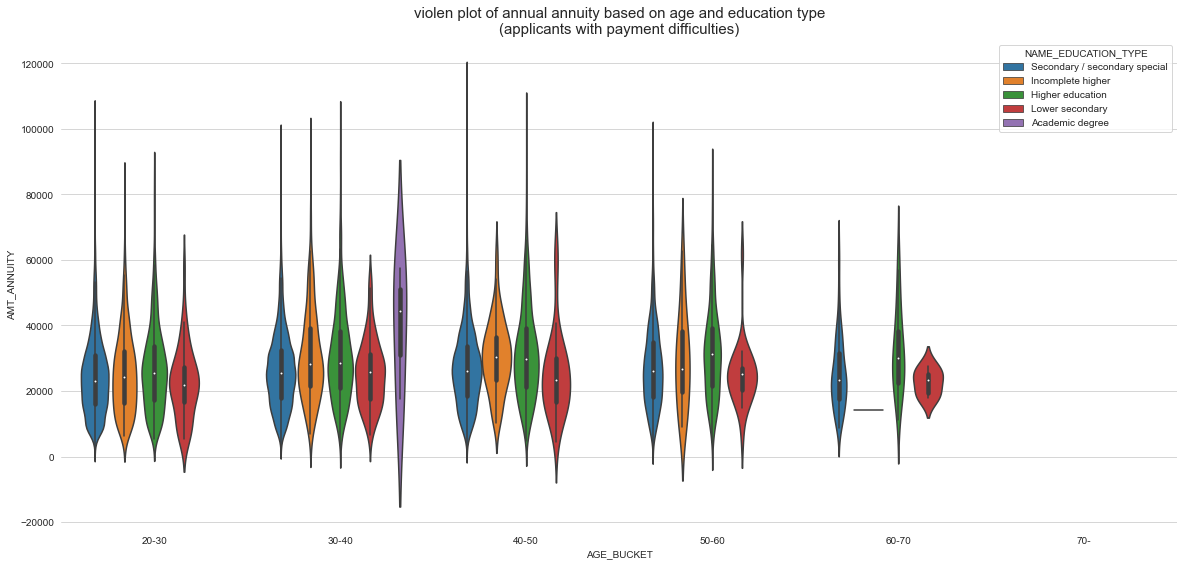

In [45]:
plt.figure(figsize=(20,9))
sns.violinplot(data=tar1_Data, x='AGE_BUCKET', y='AMT_ANNUITY', hue='NAME_EDUCATION_TYPE')
sns.despine(left=True, bottom=True)
plt.title('violen plot of annual annuity based on age and education type\n(applicants with payment difficulties)',
          fontsize= 15);

Inferences based on the plots above:
1. applicants with Academic Degree seems to face very little issue with payment difficulties
2. applicants within the age 60-70, who face difficulty in payments have very less spread of annual annuity compared to applicants who have no difficulty in payment
3. applicants within the age 56-60, applicants who have secondary/secondary special education tend to pay more annual annuity and have difficulty in payment
4. applicants with higher education and with no payment difficulties pay more annual annuity
5. There are extremely less applicants within age 60-70 having incomplete higher education face any payment difficulties compared to all age groups and even education type

**Bivariate analysis on amount annuity and annual income segmented on target variable**

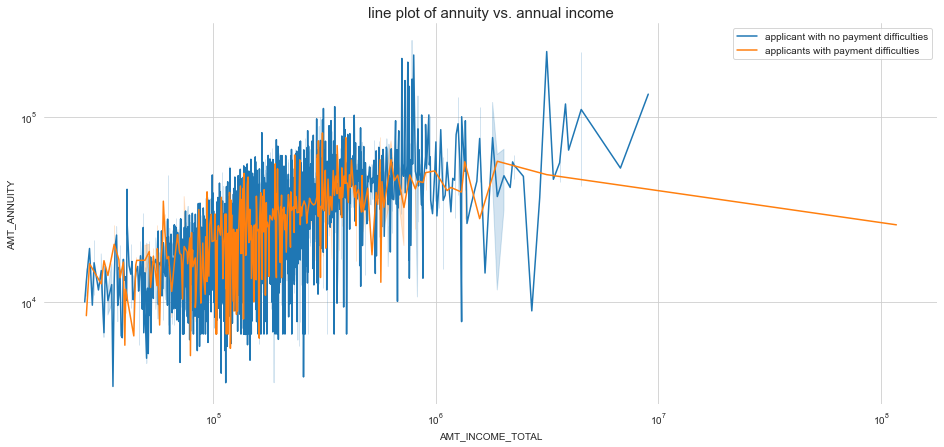

In [46]:
plt.figure(figsize= (16,7))
sns.lineplot(data=appData, x='AMT_INCOME_TOTAL', y= 'AMT_ANNUITY', hue='TARGET')
plt.title('line plot of annuity vs. annual income', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.legend(['applicant with no payment difficulties','applicants with payment difficulties'])
sns.despine(left=True, bottom=True);

Inferences from the above plot:
1. Some applicants who have no payment difficulties are paying annuity nearly 70% of their annual income
2. Most of the applicants pay nearly one third of their annual income for annuity amount

# Co-Relation

In [47]:
corr_0 = appData.loc[:, appData.columns != 'DAYS_BIRTH'].corr().abs().unstack().sort_values(ascending=False)
corr_0 = corr_0[corr_0 != 1].head(20)[::2].reset_index()
pd.DataFrame({'Rank':range(1,11),
             'Variable 1': corr_0.iloc[:,0],
             'Variable 2': corr_0.iloc[:,1],
             'score': corr_0.iloc[:,2]}).set_index('Rank')

,Variable 1,Variable 2,score
Rank,,,
1,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998527
2,AMT_CREDIT,AMT_GOODS_PRICE,0.986308
3,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.951867
4,CNT_CHILDREN,CNT_FAM_MEMBERS,0.893126
5,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.864547
6,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.861620
7,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.822125
8,AMT_ANNUITY,AMT_GOODS_PRICE,0.767810
9,AMT_CREDIT,AMT_ANNUITY,0.764175


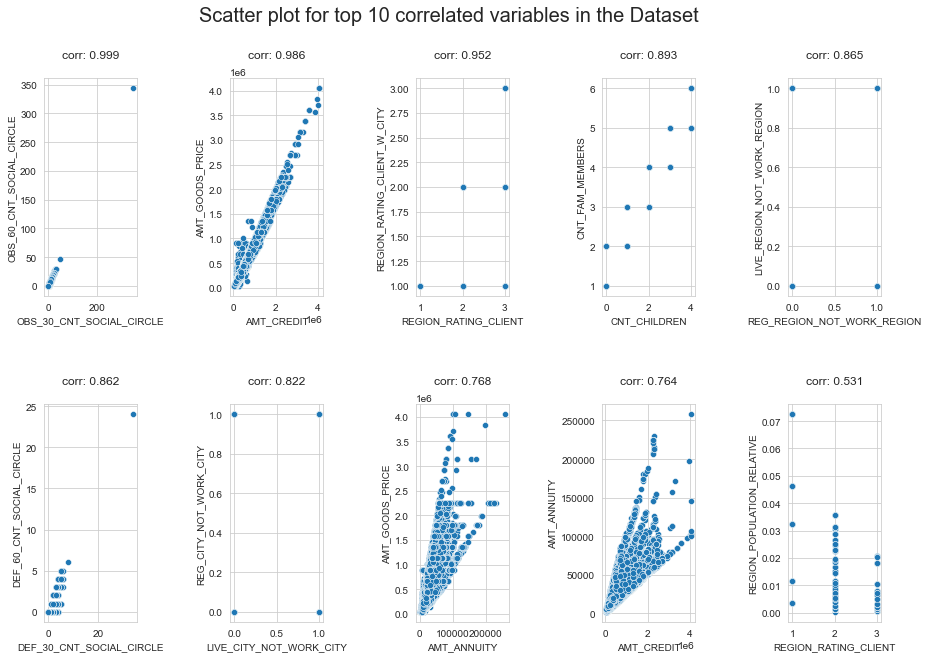

In [48]:
fig, ax= plt.subplots(2,5, figsize=(15,10))
fig.subplots_adjust(wspace=1, hspace=0.5)
fig.suptitle('Scatter plot for top 10 correlated variables in the Dataset', fontsize= 20)
j = 0
for i in range(10):
    if i > 4:
        j=1  
    sns.scatterplot(data=appData, x=corr_0.iloc[i,0], y= corr_0.iloc[i,1], ax= ax[j][i%5])
    ax[j][i%5].set_title('corr: {}'.format(str(round(corr_0.iloc[i,2],3))), pad= 20)

The Top10 correlation variables of the Dataset are printed in a Dataframe and its scatter plots are plotted above along with their correlation scores

# Previous Application Dataset

In [49]:
prevData = pd.read_csv('previous_application.csv')
prevData.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
prevData.shape

(1670214, 37)

In [51]:
#printing null count based on percentage
prevData.isna().sum() / len(prevData.index) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Removing columns which has more than 30% null values

In [52]:
nullPer = prevData.isna().sum() / len(prevData.index) * 100
nullPer = nullPer[nullPer < 30]
prevData = prevData[nullPer.index.tolist()]

In [53]:
prevData.isna().sum() / len(prevData.index) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

There are few columns where the null values exist. for the analysis sake, we will have to remove those rows that contain null values

In [54]:
prevData.dropna(inplace=True) #removing all the null values
prevData.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [55]:
prevData.shape

(1246320, 26)

**merging both application data and previous applications**

In [56]:
df = appData.merge(prevData, how= 'inner', on='SK_ID_CURR')
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,110,Consumer electronics,10.0,low_normal,POS household with interest
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,New,Mobile,POS,XNA,Country-wide,50,Connectivity,6.0,low_normal,POS mobile with interest
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Refreshed,XNA,Cash,x-sell,Country-wide,110,Consumer electronics,30.0,middle,Cash X-Sell: middle


In [57]:
df.shape

(710658, 79)

In [58]:
df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 466580
XNA                                 201393
Repairs                              14560
Other                                 9409
Urgent needs                          5133
Buying a used car                     1936
Building a house or an annex          1768
Everyday expenses                     1421
Payments on other loans               1204
Medicine                              1133
Education                             1006
Journey                                757
Buying a new car                       692
Purchase of electronic equipment       629
Wedding / gift / holiday               549
Buying a home                          547
Car repairs                            508
Furniture                              501
Buying a holiday home / land           358
Business development                   273
Gasification / water supply            146
Buying a garage                         96
Hobby                                   34
Money for a

Removing **XNA and XAP** rows from the Dataset as it does not help in visualising and gaining insights

In [59]:
df = df[(df.NAME_CASH_LOAN_PURPOSE != 'XNA') & (df.NAME_CASH_LOAN_PURPOSE != 'XAP')]

In [60]:
df.shape

(42685, 79)

Spliting the Dataset into two on the basis of Target variable

### Univariate Analysis

**Count Plot based on percentage of Loan purpose segemented on previous application status**

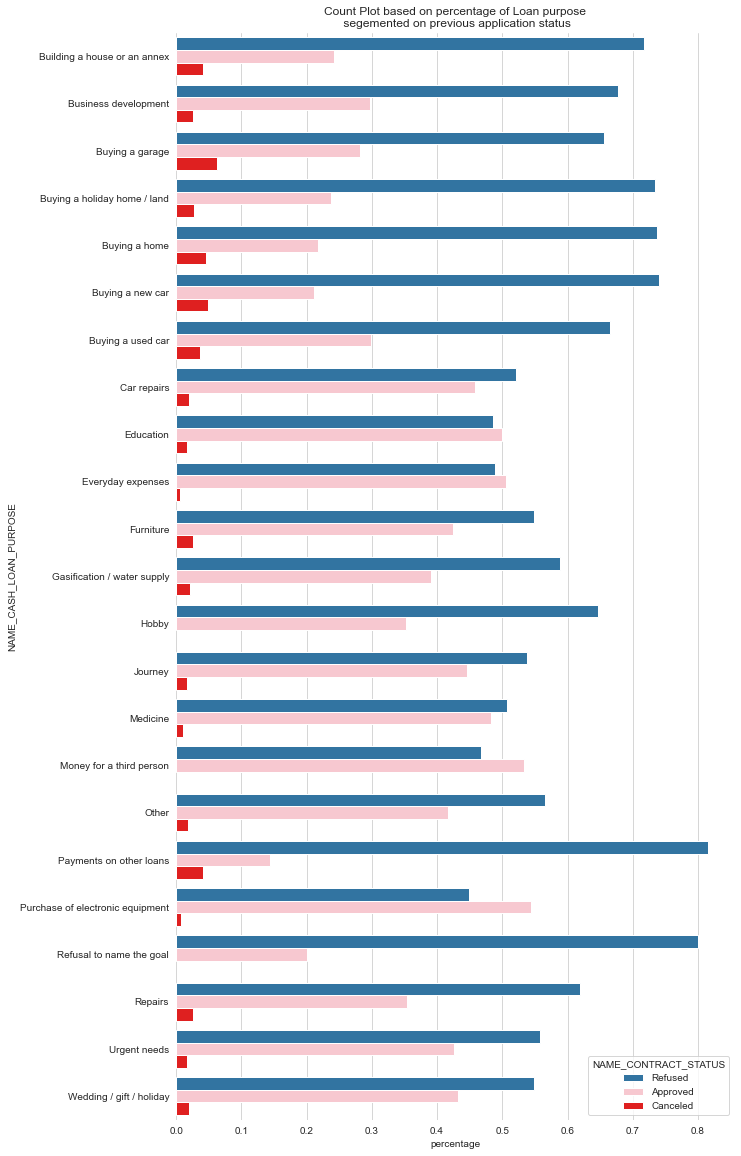

In [61]:
plt.figure(figsize=(10,20))
#the dataframe is grouped by loan purpose and contract status is extracted based on percentage value of count
per= df.groupby('NAME_CASH_LOAN_PURPOSE')['NAME_CONTRACT_STATUS'].value_counts(normalize= True).rename('percentage').reset_index()
sns.barplot(data=per, x='percentage', y='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', palette=["C0", "pink", 'red'])
plt.title('Count Plot based on percentage of Loan purpose\n segemented on previous application status', fontsize=12)
sns.despine(left=True, bottom=True)

Inferences from the above graph:
1. Cash Loan for **Electronic Equipment** has higher approval rate
2. Loans for **payments on other loans** has the highest reject rate

**Count Plot for Difference in years between current application and previous application**

In [62]:
Timebins = np.arange(0, 3,0.5) #bins for time with interval of 6 months
Timelabels = []
for i in range(0, len(Timebins) - 1): #for labels
    if i < len(Timebins) - 2:
        Timelabels.append('{}-{}'.format(Timebins[i], Timebins[i + 1]))
    else:
        Timelabels.append('{}-'.format(Timebins[i]))
print(Timelabels)

['0.0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-']


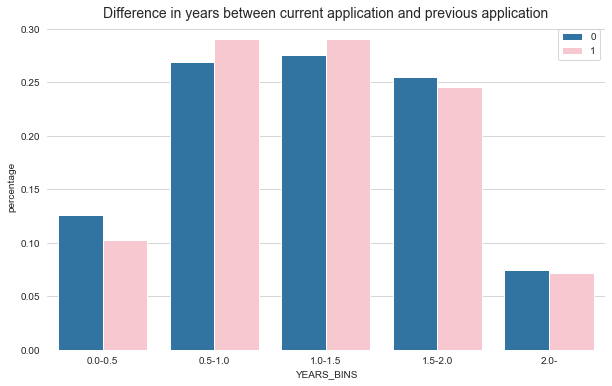

In [63]:
tp = df.copy()
tp['YEARS_DECISION'] = tp.DAYS_DECISION / (-365) #converting days to years
tp['YEARS_BINS'] = pd.cut(tp.YEARS_DECISION, bins=Timebins, labels=Timelabels) #grouping years to bins 
plt.figure(figsize=(10,6))
#countplot by percentage
#groups the data by target and extracts binned years and plotting it
per= tp.groupby('TARGET')['YEARS_BINS'].value_counts(normalize= True).rename('percentage').reset_index()
g = sns.barplot(data=per, y='percentage', x='YEARS_BINS', hue='TARGET', palette=["C0", "pink"])
plt.title('Difference in years between current application and previous application', fontsize=14)
g.legend(loc = 'upper right')
sns.despine(left=True, bottom=True);
#plt.legend([],[], frameon=False);

Inferences from above graph:
1. Most of the defaulters who previously applied for a loan, apply now with nearly a gap of 6 months to 1.5 years
2. very less people apply for loan with a gap of more than 2 years from the previous application

**Box plot of applicant's annual income by Previous Contract status segemented on target**

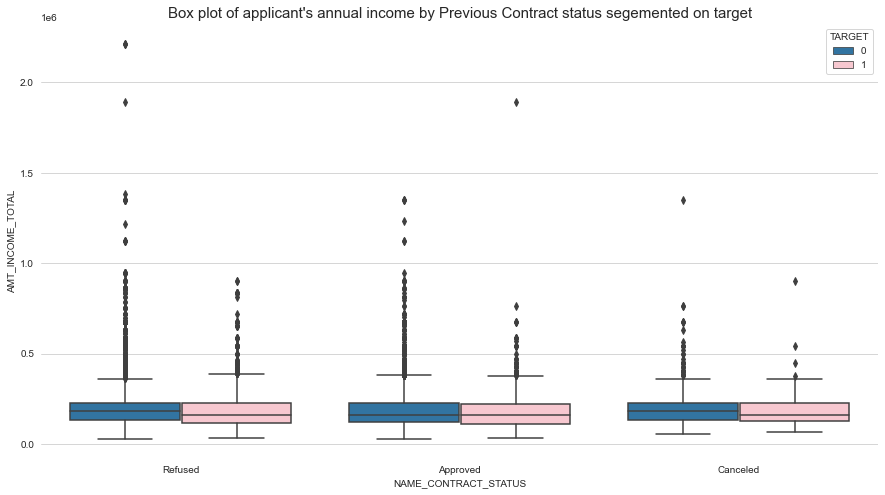

In [64]:
plt.figure(figsize=(15,8))
#boxplot
sns.boxplot(data=df, x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', hue='TARGET', palette=["C0", "pink"])
plt.title('Box plot of applicant\'s annual income by Previous Contract status segemented on target', fontsize=15)
sns.despine(left=True, bottom=True);

Inferences from the above plot:
1. Outliers are identified
2. Income of applicant's who have payment difficulties is lesser than the people who doesn't
3. Higher the income of the applicant more the chances he/seh refuses the loan offer

# Final Insights to the Client

1. Focus more on people having academic degree
2. Focus more on businesswomen who quotes for higher goods price more than 1 million
3. applicants with secondary education who are ready to pay annuity of more than 150 thousand are less likely to default
4. applicants from densely populated areas are less likely to default compared to poorly populated areas
5. applicants who are working in their current employment for more than 6 years are very less likely to default
6. Women who are into business generally would like to spend more on their goods compared to men